# Covid-19 CDC Dataset Analysis and Predictions
## Stefan Bordei


# 1. Preparing Data Quality Report for the provided CSV file.
- Read CSV
- Check shape
- Check first rows
- Check last rows
- Check the data types
- Check info for each feature
- Check column names
- Check cardinality
- Print description tables
- Check for duplicates and drop them if needed
- Save the cleaned data

In [1]:
# Import pandas, numpy, matplotlib, seaborn libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

import pandas as pd

# Import package numpy for numeric computing
import numpy as np

import matplotlib
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

# # For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

import matplotlib.patches as mpatches
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

import graphviz
from graphviz import Source
from graphviz import Digraph

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Cleaning the dataset

In [2]:
# read in data from the provided csv file to pandas dataframe.  
df = pd.read_csv('covid19-cdc-20206769.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [3]:
# check the shape of the data frame
df.shape

(10000, 12)

In [4]:
# print the first 5 rows of the data
df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/12/29,NaN,NaN,NaN,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Missing,Missing,No,Missing
1,2020/12/14,NaN,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
2,2021/01/05,NaN,NaN,NaN,Laboratory-confirmed case,Unknown,30 - 39 Years,Unknown,Missing,Missing,No,Missing
3,2021/01/05,NaN,NaN,NaN,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,Missing,No,Missing
4,2020/06/03,2020/06/09,2020/06/03,NaN,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,Missing,Missing,No,Missing


In [5]:
# print the last 5 rows of the data
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020/10/20,2020/11/04,NaN,2020/10/20,Probable Case,Female,50 - 59 Years,"Black, Non-Hispanic",No,No,No,Yes
9996,2020/11/19,2020/11/24,NaN,NaN,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,Missing,No,Missing
9997,2020/06/28,2020/08/14,NaN,2020/06/28,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing
9998,2020/11/24,2020/11/24,2020/11/24,NaN,Laboratory-confirmed case,Male,80+ Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown
9999,2020/09/24,2020/10/02,NaN,2020/09/24,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,No,Missing,No,Missing


In [6]:
# check the type of each column in the data frame
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cdc_case_earliest_dt     10000 non-null  object
 1   cdc_report_dt            7572 non-null   object
 2   pos_spec_dt              2819 non-null   object
 3   onset_dt                 5008 non-null   object
 4   current_status           10000 non-null  object
 5   sex                      10000 non-null  object
 6   age_group                10000 non-null  object
 7   race_ethnicity_combined  10000 non-null  object
 8   hosp_yn                  10000 non-null  object
 9   icu_yn                   10000 non-null  object
 10  death_yn                 10000 non-null  object
 11  medcond_yn               10000 non-null  object
dtypes: object(12)
memory usage: 937.6+ KB


In [8]:
df.describe().T

,count,unique,top,freq
cdc_case_earliest_dt,10000,325,2021/01/04,122
cdc_report_dt,7572,327,2020/06/10,145
pos_spec_dt,2819,314,2020/12/30,31
onset_dt,5008,323,2020/11/16,45
current_status,10000,2,Laboratory-confirmed case,9407
sex,10000,4,Female,5221
age_group,10000,10,20 - 29 Years,1827
race_ethnicity_combined,10000,9,Unknown,4083
hosp_yn,10000,5,No,5128
icu_yn,10000,4,Missing,7637


In [9]:
df.columns

Index(['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt',
       'current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'],
      dtype='object')

In [10]:
# Display the cardinality of each continuous feature

features_cardinality = list(df.columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

cdc_case_earliest_dt                 325
cdc_report_dt                        328
pos_spec_dt                          315
onset_dt                             324
current_status                       2
sex                                  4
age_group                            10
race_ethnicity_combined              9
hosp_yn                              5
icu_yn                               4
death_yn                             2
medcond_yn                           4


In [11]:
df.describe().T

,count,unique,top,freq
cdc_case_earliest_dt,10000,325,2021/01/04,122
cdc_report_dt,7572,327,2020/06/10,145
pos_spec_dt,2819,314,2020/12/30,31
onset_dt,5008,323,2020/11/16,45
current_status,10000,2,Laboratory-confirmed case,9407
sex,10000,4,Female,5221
age_group,10000,10,20 - 29 Years,1827
race_ethnicity_combined,10000,9,Unknown,4083
hosp_yn,10000,5,No,5128
icu_yn,10000,4,Missing,7637


In [12]:
# check the number of null values for each row
df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              2428
pos_spec_dt                7181
onset_dt                   4992
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

In [13]:
# check missing data

medcond_columns_missing  = 100 * (df['medcond_yn'].value_counts()/df.shape[0])
print(medcond_columns_missing)

icu_columns_missing  = 100 * (df['icu_yn'].value_counts()/df.shape[0])
print(icu_columns_missing)

hosp_columns_missing  = 100 * (df['hosp_yn'].value_counts()/df.shape[0])
print(hosp_columns_missing)

age_columns_missing  = 100 * (df['age_group'].value_counts()/df.shape[0])
print(age_columns_missing)

sex_missing  = 100 * (df['sex'].value_counts()/df.shape[0])
print(sex_missing)

race_ethnicity_combined  = 100 * (df['race_ethnicity_combined'].value_counts()/df.shape[0])
print(race_ethnicity_combined)

Missing    74.57
No          9.37
Yes         8.63
Unknown     7.43
Name: medcond_yn, dtype: float64
Missing    76.37
Unknown    13.23
No          9.66
Yes         0.74
Name: icu_yn, dtype: float64
No         51.28
Missing    23.71
Unknown    17.98
Yes         7.02
OTH         0.01
Name: hosp_yn, dtype: float64
20 - 29 Years    18.27
30 - 39 Years    16.38
40 - 49 Years    14.64
50 - 59 Years    14.43
60 - 69 Years    10.61
10 - 19 Years    10.03
70 - 79 Years     5.75
80+ Years         5.19
0 - 9 Years       4.58
Missing           0.12
Name: age_group, dtype: float64
Female     52.21
Male       46.90
Unknown     0.75
Missing     0.14
Name: sex, dtype: float64
Unknown                                                 40.83
White, Non-Hispanic                                     33.19
Hispanic/Latino                                          9.59
Black, Non-Hispanic                                      7.24
Multiple/Other, Non-Hispanic                             5.02
Asian, Non-Hispanic  

In [14]:
# Check for irregular cardinality & permitted values in categorical features. 

print("Unique values for:\ncurrent status:", pd.unique(df["current_status"].ravel()))
print('')
print("sex:", pd.unique(df["sex"].ravel()))
print('')
print("age_group:", pd.unique(df["age_group"].ravel()))
print('')
print("race_ethnicity_combined:", pd.unique(df["race_ethnicity_combined"].ravel()))
print('')
print("hosp_yn:", pd.unique(df["hosp_yn"].ravel()))
print('')
print("icu_yn:", pd.unique(df["icu_yn"].ravel()))
print('')
print("medcond_yn:", pd.unique(df["medcond_yn"].ravel()))

Unique values for:
current status: ['Laboratory-confirmed case' 'Probable Case']

sex: ['Male' 'Unknown' 'Female' 'Missing']

age_group: ['50 - 59 Years' '30 - 39 Years' '0 - 9 Years' '20 - 29 Years'
 '10 - 19 Years' '70 - 79 Years' '40 - 49 Years' '80+ Years'
 '60 - 69 Years' 'Missing']

race_ethnicity_combined: ['Unknown' 'White, Non-Hispanic' 'Hispanic/Latino'
 'American Indian/Alaska Native, Non-Hispanic' 'Black, Non-Hispanic'
 'Multiple/Other, Non-Hispanic' 'Asian, Non-Hispanic' 'Missing'
 'Native Hawaiian/Other Pacific Islander, Non-Hispanic']

hosp_yn: ['Missing' 'No' 'Unknown' 'Yes' 'OTH']

icu_yn: ['Missing' 'No' 'Unknown' 'Yes']

medcond_yn: ['Missing' 'No' 'Yes' 'Unknown']


In [15]:
# printing the number of 'Unknown' or 'Missing' values for the columns that might have them

print('{0:35}  {1}'.format("race_ethnicity_combined", np.isin(df['race_ethnicity_combined'], ['Missing', 'Unknown']).sum()))
print('{0:35}  {1}'.format("sex", np.isin(df['sex'], ['Missing', 'Unknown']).sum()))
print('{0:35}  {1}'.format("hosp_yn", np.isin(df['hosp_yn'], ['Missing', 'Unknown']).sum()))
print('{0:35}  {1}'.format("icu_yn", np.isin(df['icu_yn'], ['Missing', 'Unknown']).sum()))
print('{0:35}  {1}'.format("medcond_yn", np.isin(df['medcond_yn'], ['Missing', 'Unknown']).sum()))
print('{0:35}  {1}'.format("age_group", np.isin(df['age_group'], ['Missing', 'Unknown']).sum()))

# printing the number of 'Unknown' or 'Missing' values for a column that does not have them to make sure the code above works as expected
print('{0:35}  {1}'.format("death_yn", np.isin(df['death_yn'], ['Missing', 'Unknown']).sum()))

race_ethnicity_combined              4167
sex                                  89
hosp_yn                              4169
icu_yn                               8960
medcond_yn                           8200
age_group                            12
death_yn                             0


In [16]:
# check the number of unique values for each row
df.nunique()

cdc_case_earliest_dt       325
cdc_report_dt              327
pos_spec_dt                314
onset_dt                   323
current_status               2
sex                          4
age_group                   10
race_ethnicity_combined      9
hosp_yn                      5
icu_yn                       4
death_yn                     2
medcond_yn                   4
dtype: int64

In [17]:
df_duplicates = df[df.duplicated()]

In [18]:
# Print the number of duplicates, without the original rows that were duplicated

print('Number of duplicate (excluding first) rows in the table is: ', df_duplicates.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', df_duplicates[df_duplicates.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  110
Number of duplicate rows (including first) in the table is: 197


In [19]:
# Check for duplicate columns

dfT = df_duplicates.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [20]:
df_duplicates.shape

(483, 12)

In [21]:
df_duplicates.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
281,2020/12/22,NaN,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Unknown,Missing,No,Missing
513,2020/12/28,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
577,2020/07/17,2020/07/17,NaN,2020/07/17,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Missing,No,Missing
710,2020/06/22,NaN,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
1054,2021/01/02,NaN,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Missing,Missing,No,Missing


In [22]:
df_duplicates.tail()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9947,2021/01/14,NaN,NaN,NaN,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,Missing,No,Missing
9951,2020/07/03,NaN,NaN,NaN,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9969,2020/11/30,NaN,NaN,NaN,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
9971,2020/12/19,NaN,NaN,NaN,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,Unknown,Missing,No,Missing
9982,2020/07/08,2021/01/25,2020/07/08,NaN,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing


## Duplicates:

- There are no duplicate columns
- Duplicates do exist but looking at some of them it looks like the `age_group` is different so they might not be true duplicates.
- Due to the large number of `Missing` and `Unknown` values it might be possible that data was not actually collected when the forms were filled out for various reasons such as a large number of cases overwhelming the staff. 

In [23]:
# Save a copy of the data frame in a new df
df_cleaned = df

In [24]:
df_cleaned.shape

(10000, 12)

In [25]:
df_cleaned.drop('cdc_report_dt', axis=1, inplace=True)

In [26]:
df_cleaned.shape

(10000, 11)

In [27]:
# print each feature and all unique values

for col in df_cleaned[['current_status','sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','death_yn','medcond_yn']].columns:
    print(f"Column {col}:\n{df_cleaned[col].unique().tolist()}\n")

Column current_status:
['Laboratory-confirmed case', 'Probable Case']

Column sex:
['Male', 'Unknown', 'Female', 'Missing']

Column age_group:
['50 - 59 Years', '30 - 39 Years', '0 - 9 Years', '20 - 29 Years', '10 - 19 Years', '70 - 79 Years', '40 - 49 Years', '80+ Years', '60 - 69 Years', 'Missing']

Column race_ethnicity_combined:
['Unknown', 'White, Non-Hispanic', 'Hispanic/Latino', 'American Indian/Alaska Native, Non-Hispanic', 'Black, Non-Hispanic', 'Multiple/Other, Non-Hispanic', 'Asian, Non-Hispanic', 'Missing', 'Native Hawaiian/Other Pacific Islander, Non-Hispanic']

Column hosp_yn:
['Missing', 'No', 'Unknown', 'Yes', 'OTH']

Column icu_yn:
['Missing', 'No', 'Unknown', 'Yes']

Column death_yn:
['No', 'Yes']

Column medcond_yn:
['Missing', 'No', 'Yes', 'Unknown']



### More cleaning:

- All the `Unknown` features could be dropped from `sex` and `age_group` as they represent a small portion of the data and will not affect the predictions later
- For each feature merge `Missing` into `Unknown`. In the case of `1hosp_yn` also merge `OTH` into `Unknown`

In [28]:
# Merge Missing and OTH into Unknown

df_cleaned.replace({'hosp_yn' : {'Missing' : 'Unknown', 'OTH' : 'Unknown'}}, inplace=True)
df_cleaned.replace({'icu_yn' : {'Missing' : 'Unknown'}}, inplace=True)
df_cleaned.replace({'medcond_yn' : {'Missing' : 'Unknown'}}, inplace=True)
df_cleaned.replace({'race_ethnicity_combined' : {'Missing' : 'Unknown'}}, inplace=True)
df_cleaned.replace({'sex' : {'Missing' : 'Unknown'}}, inplace=True)

In [29]:
# Drop all Unknowns for sex and age_group

df_cleaned = df_cleaned[df_cleaned.sex != 'Unknown']
df_cleaned = df_cleaned[df_cleaned.age_group != 'Unknown']

In [30]:
# Check after merging and dropping Unknowns

for col in df_cleaned[['current_status','sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','death_yn','medcond_yn']].columns:
    print(f"Column {col}:\n{df_cleaned[col].unique().tolist()}\n")

Column current_status:
['Laboratory-confirmed case', 'Probable Case']

Column sex:
['Male', 'Female']

Column age_group:
['50 - 59 Years', '30 - 39 Years', '0 - 9 Years', '20 - 29 Years', '10 - 19 Years', '70 - 79 Years', '40 - 49 Years', '80+ Years', '60 - 69 Years', 'Missing']

Column race_ethnicity_combined:
['Unknown', 'White, Non-Hispanic', 'Hispanic/Latino', 'American Indian/Alaska Native, Non-Hispanic', 'Black, Non-Hispanic', 'Multiple/Other, Non-Hispanic', 'Asian, Non-Hispanic', 'Native Hawaiian/Other Pacific Islander, Non-Hispanic']

Column hosp_yn:
['Unknown', 'No', 'Yes']

Column icu_yn:
['Unknown', 'No', 'Yes']

Column death_yn:
['No', 'Yes']

Column medcond_yn:
['Unknown', 'No', 'Yes']



## Checks:
Trying to check if I can use `icu_yn` in order to infer data for `hosp_yn`. This has proven not to be the case as `hosp_yn` could be infered only in the case of `icu_yn` being Yes. A person would be hospitalized if they were in ICU. 

In [31]:
df_cleaned.loc[df_cleaned['hosp_yn'] != df_cleaned['icu_yn'], ['hosp_yn', 'icu_yn']]

,hosp_yn,icu_yn
3,No,Unknown
5,No,Unknown
7,No,Unknown
10,Yes,No
11,No,Unknown
...,...,...
9988,No,Unknown
9993,No,Unknown
9996,No,Unknown
9997,No,Unknown


In [32]:
df_cleaned.loc[(df_cleaned['hosp_yn'] != df_cleaned['icu_yn']) & (df_cleaned['icu_yn'] == 'Yes'), ['hosp_yn', 'icu_yn']]

,hosp_yn,icu_yn


In [33]:
df_cleaned.head()

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/12/29,NaN,NaN,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Unknown,No,Unknown
1,2020/12/14,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Unknown,Unknown,No,Unknown
3,2021/01/05,NaN,NaN,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,Unknown,No,Unknown
4,2020/06/03,2020/06/03,NaN,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,Unknown,Unknown,No,Unknown
5,2020/07/27,NaN,2020/07/27,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,Unknown,No,Unknown


In [34]:
# Separate categorical data and convert it to 'category' from 'object'
categorical_columns = df_cleaned[['current_status','sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','death_yn','medcond_yn']].columns

for column in categorical_columns:
    df_cleaned[column] = df_cleaned[column].astype('category')

# Separate datetime data and convert it to 'datetime' from 'object'
datetime_columns = df_cleaned[['onset_dt','cdc_case_earliest_dt','pos_spec_dt']].columns

for column in datetime_columns:
    df_cleaned[column] = pd.to_datetime(df_cleaned[column])
     
df_cleaned.dtypes

cdc_case_earliest_dt       datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

In [35]:
# Descriptive table of the categorical data
df_cleaned.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9911,2,Laboratory-confirmed case,9325
sex,9911,2,Female,5221
age_group,9911,10,20 - 29 Years,1815
race_ethnicity_combined,9911,8,Unknown,4106
hosp_yn,9911,3,No,5101
icu_yn,9911,3,Unknown,8874
death_yn,9911,2,No,9550
medcond_yn,9911,3,Unknown,8118


In [36]:
# Write the dataframe to a csv file

df_cleaned.to_csv('cleaned-covid19-cdc-20206769.csv', index=False)
df_cleaned.head()

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-12-29,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Unknown,No,Unknown
1,2020-12-14,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Unknown,Unknown,No,Unknown
3,2021-01-05,NaT,NaT,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,Unknown,No,Unknown
4,2020-06-03,2020-06-03,NaT,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,Unknown,Unknown,No,Unknown
5,2020-07-27,NaT,2020-07-27,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,Unknown,No,Unknown


# Categorical feature plotting

- Separate features into `conitnuous` and `categorical` (datetime for categorical)

In [37]:
continuous_columns = df_cleaned[["cdc_case_earliest_dt", "pos_spec_dt", "onset_dt"]]

In [38]:
continuous_columns.dtypes

cdc_case_earliest_dt    datetime64[ns]
pos_spec_dt             datetime64[ns]
onset_dt                datetime64[ns]
dtype: object

In [39]:
continuous_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9911 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cdc_case_earliest_dt  9911 non-null   datetime64[ns]
 1   pos_spec_dt           2804 non-null   datetime64[ns]
 2   onset_dt              4983 non-null   datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 309.7 KB


In [40]:
categorical_columns = df_cleaned[["current_status", "sex", "age_group", "race_ethnicity_combined","hosp_yn", 'icu_yn','medcond_yn']]

In [41]:
categorical_columns.dtypes

current_status             category
sex                        category
age_group                  category
race_ethnicity_combined    category
hosp_yn                    category
icu_yn                     category
medcond_yn                 category
dtype: object

In [42]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9911 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   current_status           9911 non-null   category
 1   sex                      9911 non-null   category
 2   age_group                9911 non-null   category
 3   race_ethnicity_combined  9911 non-null   category
 4   hosp_yn                  9911 non-null   category
 5   icu_yn                   9911 non-null   category
 6   medcond_yn               9911 non-null   category
dtypes: category(7)
memory usage: 146.5 KB


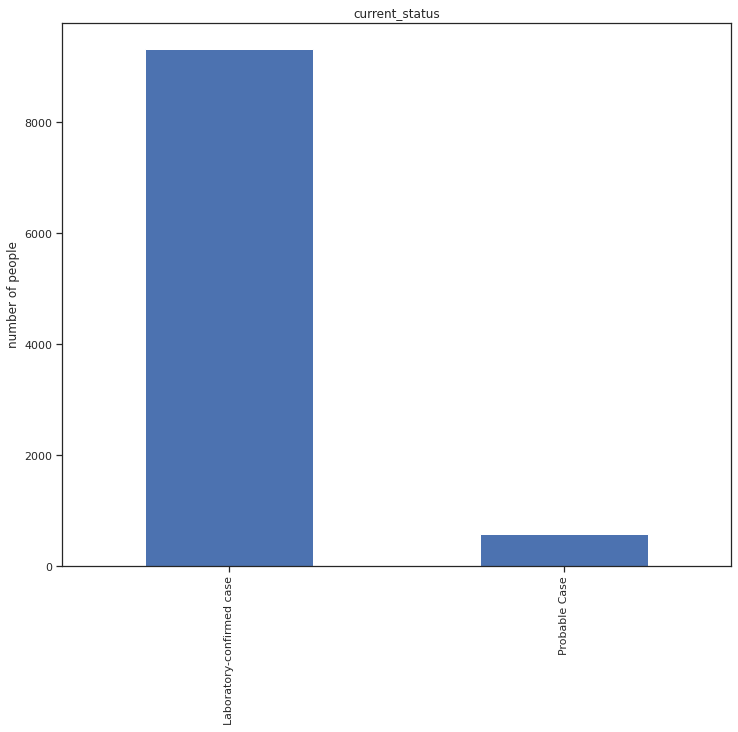

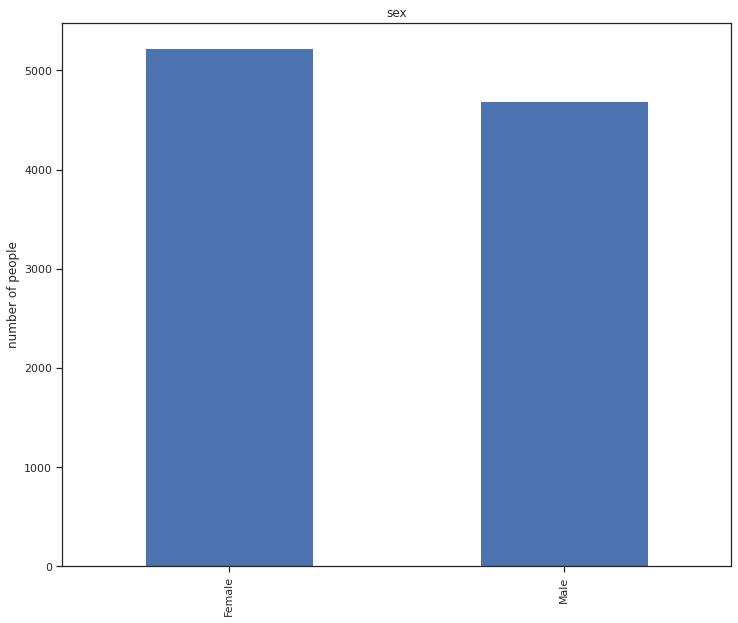

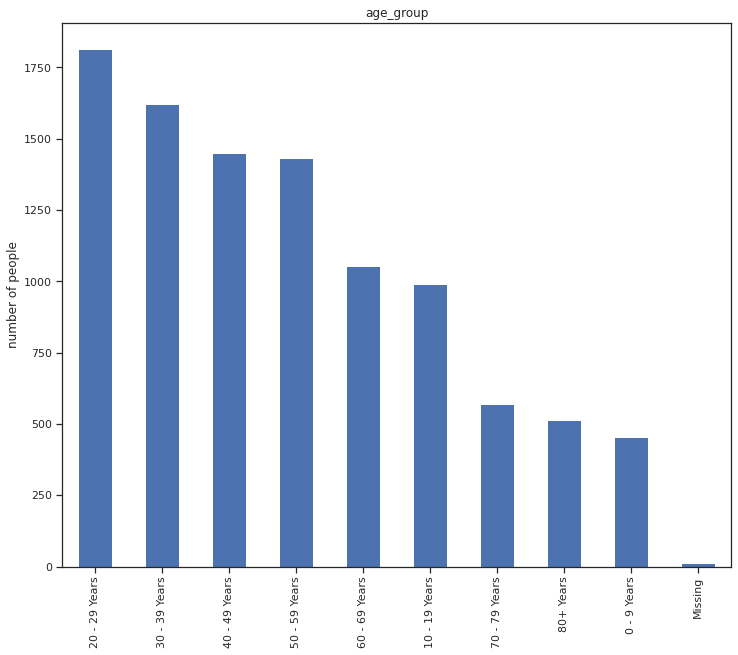

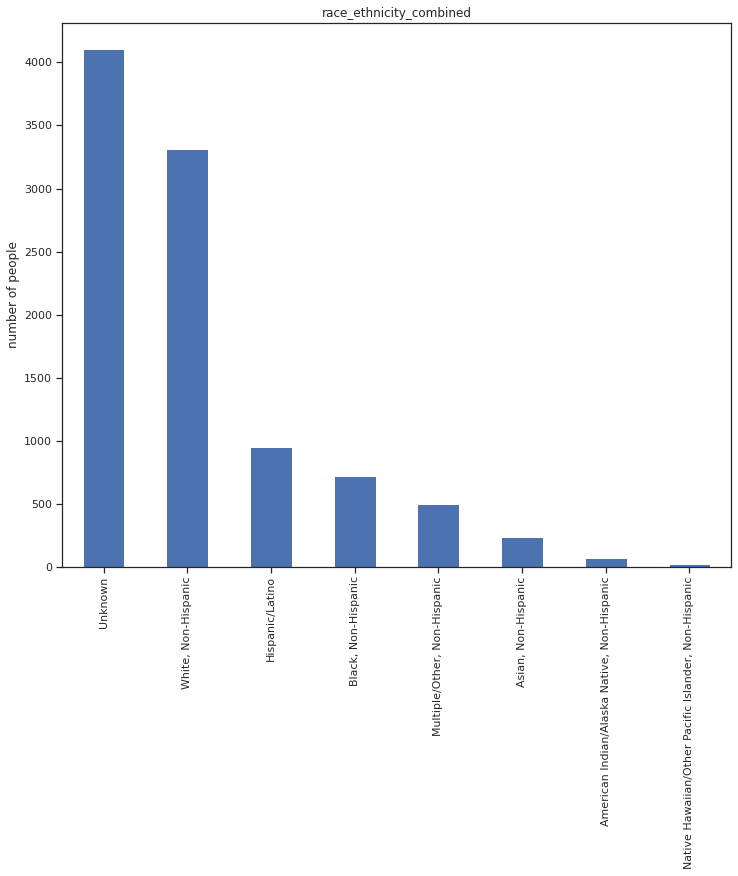

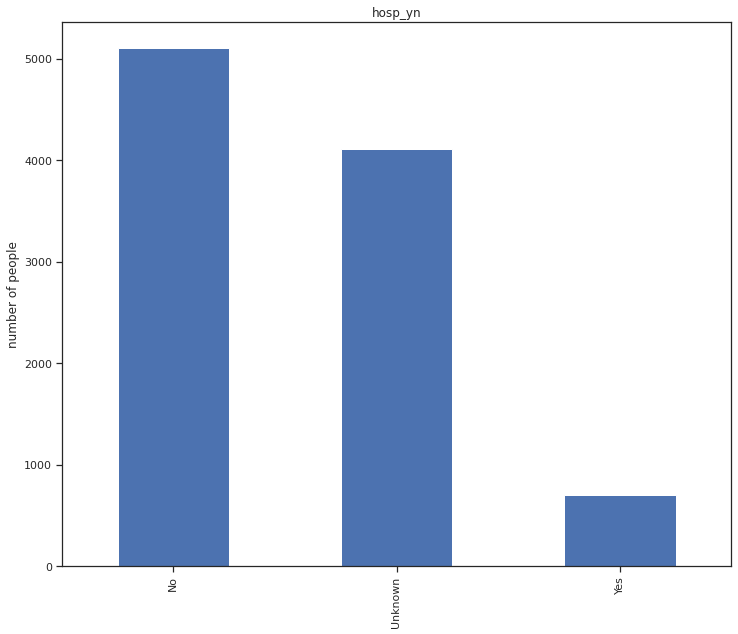

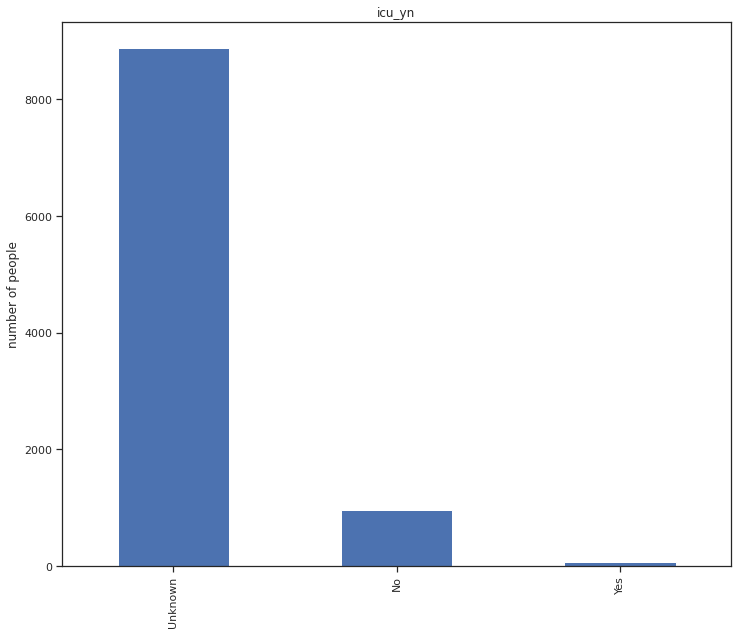

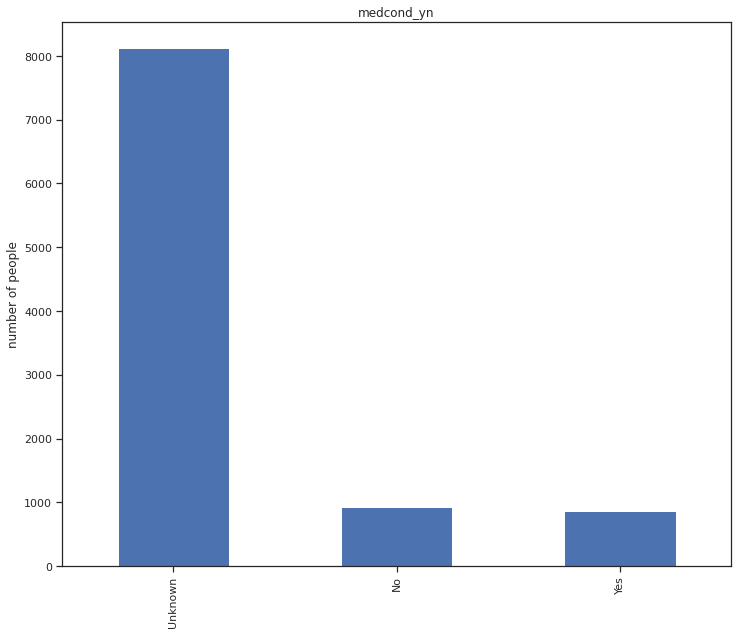

In [43]:
# Plot bar plots for all the catagorical features 
# All plots are saved to a PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for col in categorical_columns:
        f = df_cleaned[col].value_counts().plot(kind='bar', figsize=(12,10))
        plt.title(col)
        plt.ylabel('number of people')
        pp.savefig(f.get_figure())
        plt.show()

# 1 Preparation

### Encode `death_yn`

In [44]:
# Encode death_tn and change it to int64

df_cleaned.replace({'death_yn' : {'No' : 0, 'Yes' : 1}}, inplace=True)
df_cleaned['death_yn'] = df_cleaned['death_yn'].astype('int64')

## Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test.

In [45]:
df_prepared = df_cleaned.sample(frac = 1,  random_state= 420)

In [46]:
# Split

y = pd.DataFrame(df_prepared["death_yn"])
X = df_prepared.drop(["death_yn"],1)

In [47]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=420)

print("original range is: ",df_prepared.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  9911
training range (70%):	 rows 0 to 6937
test range (30%): 	 rows 6937 to 9911


In [48]:
X_train

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,medcond_yn
6955,2020-07-17,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Unknown,Unknown
6016,2020-11-20,NaT,2020-11-20,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Unknown,Unknown
3094,2020-07-02,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Unknown,Unknown
7891,2021-01-15,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"Multiple/Other, Non-Hispanic",Unknown,Unknown,Unknown
6847,2021-01-10,NaT,2021-01-10,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...
8641,2020-12-08,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Unknown,Unknown,Unknown
2770,2020-07-12,NaT,2020-07-12,Probable Case,Male,40 - 49 Years,Unknown,No,Unknown,Unknown
2018,2020-12-14,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Unknown,Unknown
3591,2020-04-01,NaT,2020-04-01,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",No,Unknown,Unknown


## Plot the correlations between all the categorical features.

In [49]:
y_train = y_train.astype("category")

In [50]:
# Create temp dataframe for these plots, mergeing X_train and y_train
df_temp= pd.concat([X_train, y_train], axis=1)


 current_status
Index 	 Count
Laboratory-confirmed case 	 6525
Probable Case 	 412

 sex
Index 	 Count
Female 	 3650
Male 	 3287

 age_group
Index 	 Count
20 - 29 Years 	 1270
40 - 49 Years 	 1013
30 - 39 Years 	 1143
0 - 9 Years 	 331
10 - 19 Years 	 682
60 - 69 Years 	 735
70 - 79 Years 	 406
50 - 59 Years 	 992
80+ Years 	 359
Missing 	 6

 race_ethnicity_combined
Index 	 Count
Unknown 	 2874
Multiple/Other, Non-Hispanic 	 341
White, Non-Hispanic 	 2324
Black, Non-Hispanic 	 507
Hispanic/Latino 	 657
Asian, Non-Hispanic 	 168
American Indian/Alaska Native, Non-Hispanic 	 49
Native Hawaiian/Other Pacific Islander, Non-Hispanic 	 17

 hosp_yn
Index 	 Count
Unknown 	 2877
No 	 3573
Yes 	 487

 icu_yn
Index 	 Count
Unknown 	 6183
Yes 	 60
No 	 694

 medcond_yn
Index 	 Count
Unknown 	 5655
No 	 680
Yes 	 602


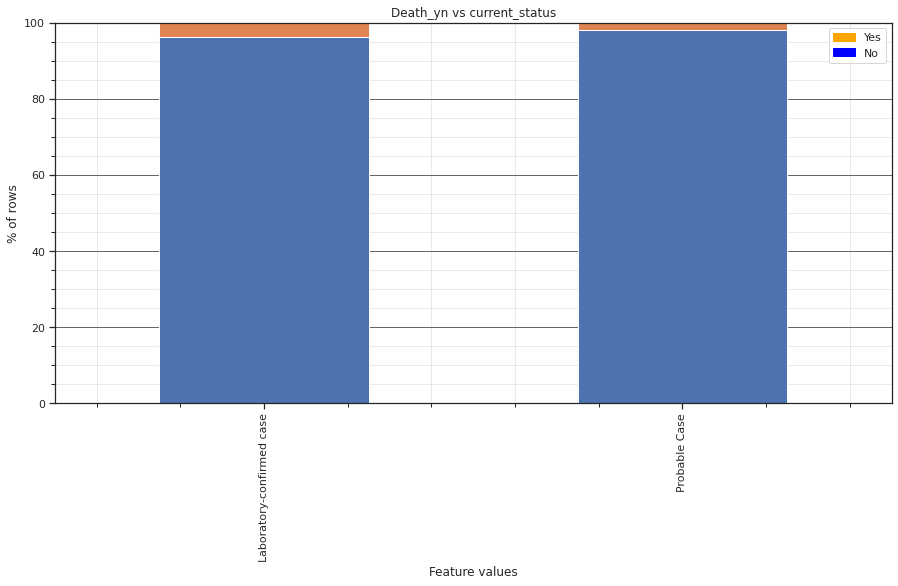

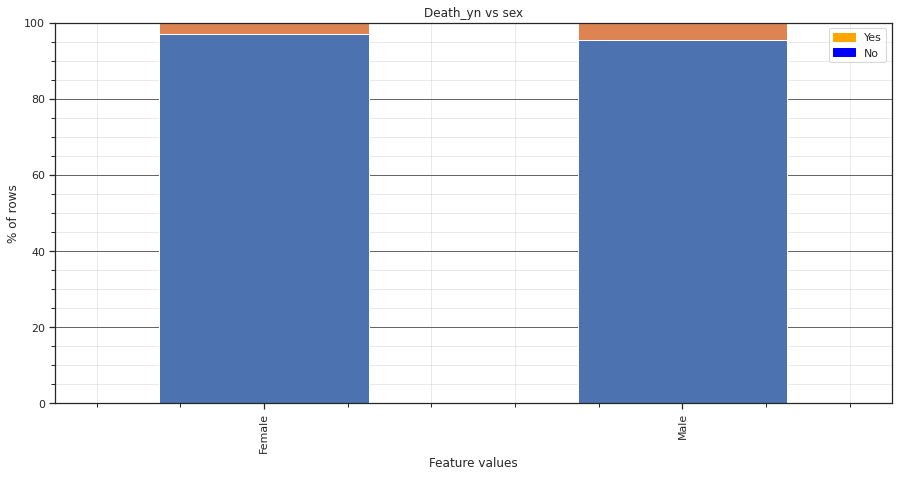

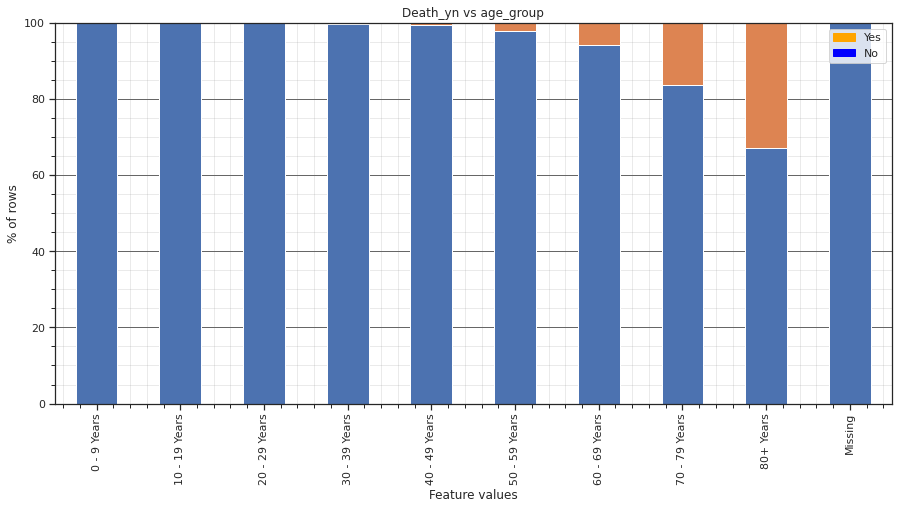

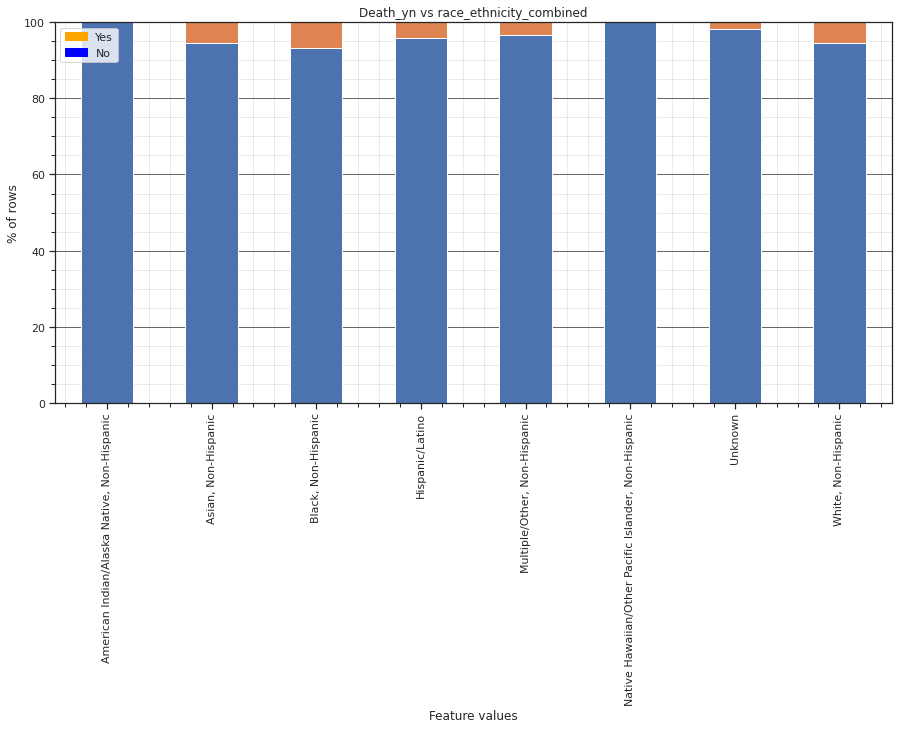

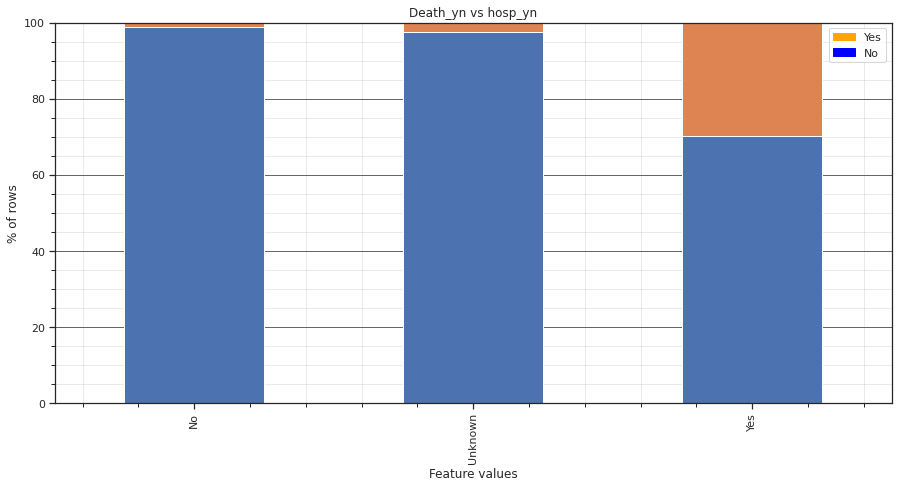

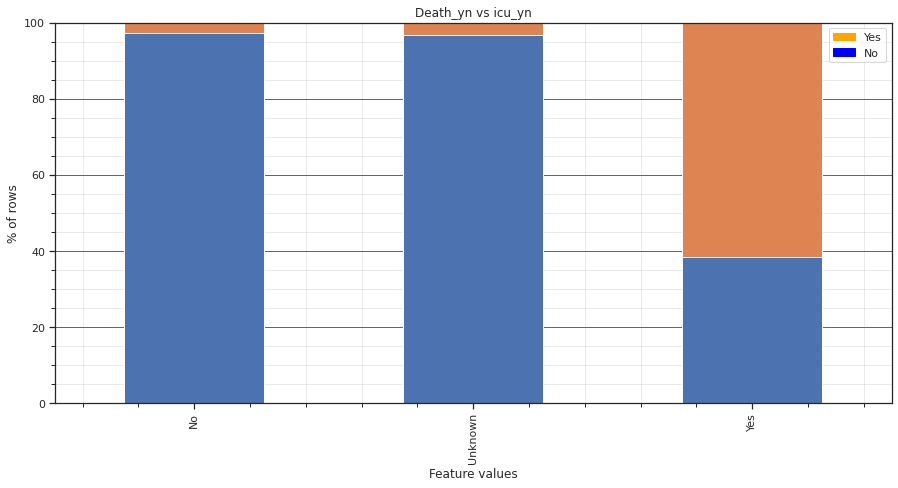

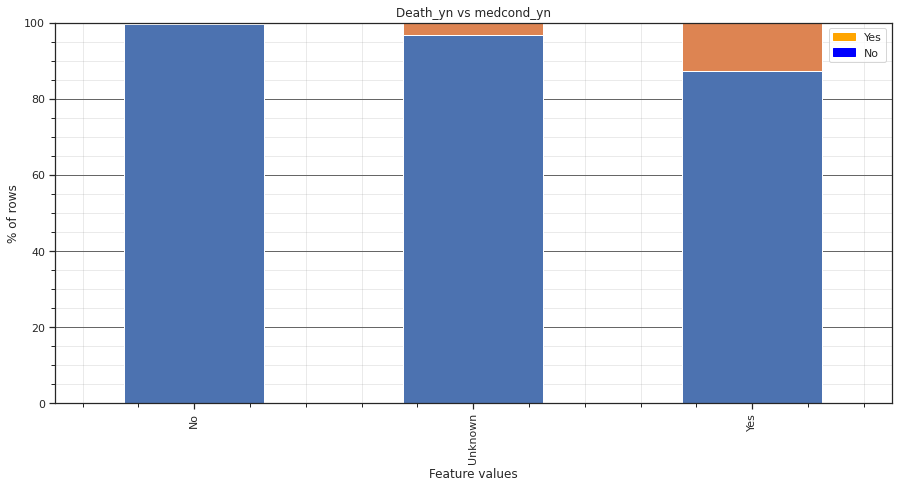

In [51]:
for categorical_feature in categorical_columns:
    maxDelqEver = pd.unique(df_temp[categorical_feature].ravel())
    df_temp['percent'] = 0

    # Header
    print("\n", categorical_feature)
    print("Index \t Count")
    
    for i in maxDelqEver:

        count = df_temp[df_temp[categorical_feature] == i].count()['death_yn']
        count_percentage = (1 / count) * 100
        print(i, "\t", count)
        index_list = df_temp[df_temp[categorical_feature] == i].index.tolist()
        for ind in index_list:
            df_temp.loc[ind, 'percent'] = count_percentage

    group = df_temp[['percent',categorical_feature,'death_yn']].groupby([categorical_feature,'death_yn']).sum()
    my_plot = group.unstack().plot(kind='bar', stacked=True, title=f"Death_yn vs {categorical_feature}", figsize=(15,7), grid=True)

    # Legend
    red_patch = mpatches.Patch(color='orange', label='Yes')
    blue_patch = mpatches.Patch(color='blue', label='No')
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # Gridlines
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    # Labels
    my_plot.set_xlabel("Feature values")
    my_plot.set_ylabel("% of rows")
    my_plot.set_ylim([0,100])
    
# Drop 'percent' that was used only for stacked bar plot
df_temp = df_temp.drop("percent", 1)

## Interpreting features paired with `death_yn`:

- current_status: there is a correlation between the two but not a strong one. The low number of `death_yn_Yes` might cause that.
- sex: there is a correlation between the two but not a strong one. The low number of `death_yn_Yes` might cause that.
- age_group: there seems to be a strong correlation
- race_ethnicity_combined: there is not a strong correlation.
- hosp_yn: there is a strong enough correlation
- medcond_yn: there is a strong enough correlation
- icu_yn: this feature pair has the strongest correlation

## Drop features that are not needed

After visually analizing the data I have decided to drop:

- cdc_case_earliest_dt
- sex
- current_status
- race_ethnicity_combined
- onset_dt
- pos_spec_dt

The features listed above will be dropped as it seems that they don't have a big impact and there is not a strong correlation.

In [52]:
df_prepared = df_prepared.drop(['cdc_case_earliest_dt'], 1)
df_prepared = df_prepared.drop(['sex'], 1)
df_prepared = df_prepared.drop(['current_status'], 1)
df_prepared = df_prepared.drop(['race_ethnicity_combined'], 1)
df_prepared = df_prepared.drop(['onset_dt'], 1)
df_prepared = df_prepared.drop(['pos_spec_dt'], 1)

In [53]:
df_prepared

,age_group,hosp_yn,icu_yn,death_yn,medcond_yn
7662,30 - 39 Years,No,Unknown,0,Unknown
3054,40 - 49 Years,Unknown,Unknown,0,Unknown
8924,50 - 59 Years,No,Unknown,0,Unknown
8512,20 - 29 Years,No,Unknown,0,Unknown
7810,20 - 29 Years,Unknown,Unknown,0,Unknown
...,...,...,...,...,...
268,20 - 29 Years,No,Unknown,0,Unknown
1218,30 - 39 Years,No,Unknown,0,Unknown
2698,80+ Years,No,Unknown,0,Unknown
4711,30 - 39 Years,Unknown,Unknown,0,Unknown


## Data Quality Plan:

## Observations:

- The data sample contains 12 columns and 10 000 rows
- The type for all the features is 'object' and needs to be changed to datetime and category
- There are no numeric values
- All the features are categorical, there are no continuous features in the data set
- The data sample contains duplicates that have to be dropped
- The data sample contains a high number of Null, Unknown or Missing values for multiple features

### Summary of data quality plan:

| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| cdc_case_earliest_dt               | OK                            | Do Nothing                     |
| cdc_report_dt                      | Deprecated                    | Remove                         |
| pos_spec_dt                        | Null values                   | Do Nothing                     |
| onset_dt                           | Missing or Unknown Values     | Merge Missing and Unknown      |
| current_status                     | OK                            | Do Nothing                     |
| sex                                | Missing or Unknown Values     | Drop Missing and Unknown       |
| age_group                          | Missing or Unknown Values     | Drop Missing and Unknown       |
| race_ethnicity_combined            | Missing or Unknown Values     | Merge Missing and Unknown      |
| hosp_yn                            | Missing or Unknown Values     | Merge Missing and Unknown      |
| icu_yn                             | Missing or Unknown Values     | Merge Missing and Unknown      |
| death_yn                           | OK                            | Do Nothing                     |
| medcond_yn                         | Missing or Unknown Values     | Merge Missing and Unknown      |


# Prepare dataset for modeling

- Convert the categorical variables into dummies variable to allow modeling
- Remove the redundant dummies which contain no additional information
- Set up the train test split again based on the dataset with the dummies included


In [54]:
# Use a copy of the prepared data set to work on
df_rev1 = df_prepared.copy()

In [55]:
df_rev1 = pd.get_dummies(df_rev1, columns=['age_group','hosp_yn','icu_yn','medcond_yn'], drop_first=True)

In [56]:
df_rev1

,death_yn,age_group_10 - 19 Years,age_group_20 - 29 Years,age_group_30 - 39 Years,age_group_40 - 49 Years,age_group_50 - 59 Years,age_group_60 - 69 Years,age_group_70 - 79 Years,age_group_80+ Years,age_group_Missing,hosp_yn_Unknown,hosp_yn_Yes,icu_yn_Unknown,icu_yn_Yes,medcond_yn_Unknown,medcond_yn_Yes
7662,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3054,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
8924,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
8512,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
7810,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1218,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2698,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4711,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0


In [57]:
y = df_rev1["death_yn"]
X = df_rev1.drop(["death_yn"],1)

# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ",df_rev1.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  9911
training range (70%):	 rows 0 to 6937
test range (30%): 	 rows 6937 to 9911


In [58]:
print("\nDescriptive features in X:\n", X_train.head(5))
print("\nTarget feature in y:\n", y_train.head(5))


Descriptive features in X:
       age_group_10 - 19 Years  age_group_20 - 29 Years  \
6959                        0                        0   
7789                        0                        1   
2911                        0                        0   
8108                        0                        0   
1060                        0                        0   

      age_group_30 - 39 Years  age_group_40 - 49 Years  \
6959                        0                        1   
7789                        0                        0   
2911                        0                        0   
8108                        0                        0   
1060                        0                        0   

      age_group_50 - 59 Years  age_group_60 - 69 Years  \
6959                        0                        0   
7789                        0                        0   
2911                        0                        0   
8108                        1            

## Reset index

In [59]:
X_train.head(5)

,age_group_10 - 19 Years,age_group_20 - 29 Years,age_group_30 - 39 Years,age_group_40 - 49 Years,age_group_50 - 59 Years,age_group_60 - 69 Years,age_group_70 - 79 Years,age_group_80+ Years,age_group_Missing,hosp_yn_Unknown,hosp_yn_Yes,icu_yn_Unknown,icu_yn_Yes,medcond_yn_Unknown,medcond_yn_Yes
6959,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
7789,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
2911,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
8108,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
1060,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0


In [60]:
# Resetting the index to allow contatenation with predicted values
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,age_group_10 - 19 Years,age_group_20 - 29 Years,age_group_30 - 39 Years,age_group_40 - 49 Years,age_group_50 - 59 Years,age_group_60 - 69 Years,age_group_70 - 79 Years,age_group_80+ Years,age_group_Missing,hosp_yn_Unknown,hosp_yn_Yes,icu_yn_Unknown,icu_yn_Yes,medcond_yn_Unknown,medcond_yn_Yes
0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0


# 2 Linear regression model

Train a linear regression model using only the descriptive features selected from part 1 above

In [61]:
# Train a model using all continuous and categorical features.
multiple_linreg = LinearRegression().fit(X_train, y_train)

### Print out the coefficients learned by the model

In [62]:
# Print the weights learned for each feature.

print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_linreg.coef_)
print("\nIntercept is: \n", multiple_linreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_linreg.coef_)))


Features are: 
 Index(['age_group_10 - 19 Years', 'age_group_20 - 29 Years',
       'age_group_30 - 39 Years', 'age_group_40 - 49 Years',
       'age_group_50 - 59 Years', 'age_group_60 - 69 Years',
       'age_group_70 - 79 Years', 'age_group_80+ Years', 'age_group_Missing',
       'hosp_yn_Unknown', 'hosp_yn_Yes', 'icu_yn_Unknown', 'icu_yn_Yes',
       'medcond_yn_Unknown', 'medcond_yn_Yes'],
      dtype='object')

Coeficients are: 
 [ 5.02263383e-04  3.43928064e-06 -1.31707688e-03 -3.73216382e-03
  5.26148352e-03  2.62830431e-02  1.00840152e-01  2.45390268e-01
  2.12753785e-03  9.97612566e-03  1.72175864e-01  3.04410756e-02
  3.96976170e-01 -5.21003079e-03  2.71512107e-02]

Intercept is: 
 -0.030253904741784604

Features and coeficients: 
 [('age_group_10 - 19 Years', 0.0005022633825153252), ('age_group_20 - 29 Years', 3.4392806420263293e-06), ('age_group_30 - 39 Years', -0.0013170768811897973), ('age_group_40 - 49 Years', -0.0037321638210315853), ('age_group_50 - 59 Years', 0.0052

### Interpreting the linear regression model

The Linear Regression model is based on the formula:

$target\_feature = w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n $

The intercept represents the point where the line meets the Y axis wneh X is 0.

Positive coeficiemts:

- A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.
- A person with `ycu_yn_Yes` has a higher chance of dying than a person in the `age_group10 - 19`

Negative coefficients:

- A negative coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable tends to decrease.
- A person with `age_group_30 - 39 Years` has a higher chance of dying than a person in the `medcond_yn_Unknown`

Linear Regression is not recommended as we are trying to solve a classification problem.

### Printing 10 predicted target features and evaluate the prediction

In [63]:
multiple_linreg_predictions_train = (multiple_linreg.predict(X_train) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

   death_yn  Predicted
0         0        0.0
1         0        0.0
2         0        0.0
3         0        0.0
4         0        0.0
5         0        0.0
6         0        0.0
7         0        0.0
8         0        0.0
9         0        0.0


### Evaluation metrics based on training data

In [64]:
# Some more evaluation metrics.

print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.9664119936572005
Confusion matrix: 
 [[6672   19]
 [ 214   32]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      6691
           1       0.63      0.13      0.22       246

    accuracy                           0.97      6937
   macro avg       0.80      0.56      0.60      6937
weighted avg       0.96      0.97      0.96      6937



## Interpretation of results
- Accuracy
    - This is simply stating how often the model is correct. We have an accuracy of 73%
- Confusion Matrix
    - [0][0] TRUE NEGATIVE - The number that is predicted 0 that was actually 0
    - [0][1] FALSE POSITIVE - The number that is predicted 1 that is actually 0
    - [1][0] FALSE NEGATIVE - The number that is predicted 0 that is actually 1
    - [1][1] TRUE POSITIVE - The number that is predicted 1 that is actually 1
- Precision - How good the model is at predicting the positive class
    - What % of the predicted positive are actually positive
    - It is the number values correctly predicted positive over the total number of  positive values
    - Precision Positive is 0.97
    - Precision Negative is 0.63
- Recall
    - What % of the positive values did we predict
    - Is the number correctly predicted positive over the total number actual positive
    - Recall Positive is 1.00
    - Recall Negative is 0.13
- F1 Score
    - Is an a weighted average of Precision and recall
    - F1 Score Positive is 0.98
    - F1 Score Negative is 0.22


Conclusion:

- The mode is better at predictiong a negative `death_yn`
- This makes sense as most of the training data had `death_yn_No`

### Evaluate the model using the hold-out (30% examples) test set

In [65]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_linreg_predictions_test = (multiple_linreg.predict(X_test) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_test, pd.DataFrame(multiple_linreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(100))


Predictions with multiple linear regression: 

    death_yn  Predicted
0          0        0.0
1          0        0.0
2          0        0.0
3          0        0.0
4          0        0.0
..       ...        ...
95         0        0.0
96         0        0.0
97         0        0.0
98         0        0.0
99         0        0.0

[100 rows x 2 columns]


In [66]:
# Some more evaluation metrics for train/test
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_linreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_linreg_predictions_test))
print("Classification report - Test data:\n ", metrics.classification_report(y_test, multiple_linreg_predictions_test))
print("\n==================== Train Data ======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("\nClassification report: - Training data\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))

==================== Test Data =======================
Accuracy:  0.9630127774041695
Confusion matrix: 
 [[2850    9]
 [ 101   14]]
Classification report - Test data:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      2859
           1       0.61      0.12      0.20       115

    accuracy                           0.96      2974
   macro avg       0.79      0.56      0.59      2974
weighted avg       0.95      0.96      0.95      2974


==================== Train Data ======================
Accuracy:  0.9664119936572005
Confusion matrix: 
 [[6672   19]
 [ 214   32]]

Classification report: - Training data
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      6691
           1       0.63      0.13      0.22       246

    accuracy                           0.97      6937
   macro avg       0.80      0.56      0.60      6937
weighted avg       0.96      0.97      0.96      6937



**Interpretation of test results and comparison with training results**
- Accuracy
    - The accuracy of the test data is lower. 
- Precision
    - The precision score for predicting the positive case hasn't changed.
    - The precision score for predicting the negative case has lowered.
- Recall
    - The recall score for predicting the positive case hasn't changed.
    - The recall score for predicting the negative case has lowered.
- F1
    - The f1 score for predicting the positive case has increased.
    - The f1 score for predicting the negative case has lowered.


##  Cross validation
- Perform cross validation on the linear regression model. 
- Perform the same evaluation as above but multiple times
- Store the results in a dictionary for later use


In [67]:
def cross_val_LinReg(X, y, cv=3, scoring='accuracy'):
    results = []
    for i in range(cv):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i , test_size=0.3)
        multiple_linreg = LinearRegression().fit(X_train, y_train)
        multiple_linreg_predictions = (multiple_linreg.predict(X_test) >= 0.5) * 1.0
        if scoring=='accuracy':
            score = metrics.accuracy_score(y_test, multiple_linreg_predictions)
        elif scoring=='precision':
            score = metrics.precision_score(y_test, multiple_linreg_predictions)
        elif scoring=='f1':
            score = metrics.f1_score(y_test, multiple_linreg_predictions)
        elif scoring=='recall':
            score = metrics.recall_score(y_test, multiple_linreg_predictions)
        results.append(score)
        
    return results

### Additional function to perform 10 fold cross validation and store results into a dataframe


In [68]:
def cross_val_LinReg_DF(X,y):
    linRegResults = {}
    test_metrics = ['accuracy','precision','recall', 'f1']
    
    for metric in test_metrics:
        result = cross_val_LinReg(X, y, cv=10, scoring=metric)
        length = len(result)
        linRegResults[metric] = sum(result)/length

    LinRegDF = pd.DataFrame.from_dict(linRegResults, orient='index', columns=['Linear_Regression'])
    
    return LinRegDF

#### Preform 10 fold cross validation using cross_val_LinReg_DF function

In [69]:
linRegDF = cross_val_LinReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
linRegDF

Mean results from 10 fold cross validation are:


,Linear_Regression
accuracy,0.963618
precision,0.638890
recall,0.132446
f1,0.218606


### Conclusion:

The results are lower than the previous ones as we took the mean of 10 sets of results.

## 3 Logistic Regression  

### Train a logistic regression model using only the descriptive features selected from part 1 above

In [70]:
# Train a model using all continuous and categorical features.
multiple_logisticreg = LogisticRegression().fit(X_train, y_train)

### Print out the coefficients learned by the model

In [71]:
# Print the weights learned for each feature.

print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_logisticreg.coef_[0])
print("\nIntercept is: \n", multiple_logisticreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_logisticreg.coef_[0])))


Features are: 
 Index(['age_group_10 - 19 Years', 'age_group_20 - 29 Years',
       'age_group_30 - 39 Years', 'age_group_40 - 49 Years',
       'age_group_50 - 59 Years', 'age_group_60 - 69 Years',
       'age_group_70 - 79 Years', 'age_group_80+ Years', 'age_group_Missing',
       'hosp_yn_Unknown', 'hosp_yn_Yes', 'icu_yn_Unknown', 'icu_yn_Yes',
       'medcond_yn_Unknown', 'medcond_yn_Yes'],
      dtype='object')

Coeficients are: 
 [-1.37088025 -1.21538489 -1.18429001 -0.63803911  0.44416535  1.29949637
  2.21657284  3.10845775 -0.07251322  0.76028996  2.39317276  0.9279907
  2.33513412  0.64114062  1.37097645]

Intercept is: 
 [-6.78565913]

Features and coeficients: 
 [('age_group_10 - 19 Years', -1.3708802531714452), ('age_group_20 - 29 Years', -1.215384890218537), ('age_group_30 - 39 Years', -1.1842900118838937), ('age_group_40 - 49 Years', -0.6380391133912737), ('age_group_50 - 59 Years', 0.4441653531576263), ('age_group_60 - 69 Years', 1.2994963695227575), ('age_group_70 - 7

### Interpreting the results 

The model estimated in logistic regression is given by the logistic function:

$probability(target=1|descriptive\_features)=logistic(w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n)$ <br>
where $logistic(x)$ is defined as: $logistic(x) = \frac{e ^ x}{1 + e ^ x} = \frac{1}{1+e^{-x}}$

Logistic regression, as oppose to Linear Regression can be used for solving a Classification Problem.

The Intercept is at **-6.785**, this represents the starting point. If all the other coeficients were 0 X would be -6.785.

The coeficients have the same effect on X as in Linear Regression.

*The Logistic Regression outputs a probability as a value between 0 and 1, representing the likelyhood of dying.*

### Printing 10 predicted target features and evaluate the prediction
- Print the predicted target feature value for the first 100 training examples based on training data

In [72]:
multiple_logisticreg_predictions_train = multiple_logisticreg.predict(X_train)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_train, pd.DataFrame(multiple_logisticreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(10))


Predictions with multiple linear regression: 

   death_yn  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
5         0          0
6         0          0
7         0          0
8         0          0
9         0          1


### Evaluation metrics based on training data
- Print the classification evaluation measures computed on the training set (e.g. Accuracy, Confusion matrix, Precision, Recall, F1)

In [73]:
# Some more evaluation metrics.

print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.9658353755225602
Confusion matrix: 
 [[6633   58]
 [ 179   67]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      6691
           1       0.54      0.27      0.36       246

    accuracy                           0.97      6937
   macro avg       0.75      0.63      0.67      6937
weighted avg       0.96      0.97      0.96      6937



Interpretation of results
- Accuracy
    - We have an accuracy of 97%
- Precision - How good model is a prediction the positive class
    - Precision Positive is 0.97
    - Precision Negative is 0.54
- Recall - What % of the positive values did we predict
    - Recall Positive is 0.99
    - Recall Negative is 0.27
- F1 Score - Is an a weighted average of Precision and recall
    - F1 Score Positive is 0.98
    - F1 Score Negative is 0.36


Conclusion:

- The mode is better at predictiong a negative `death_yn`
- This makes sense as most of the training data had `death_yn_No`

### Evaluate the model using the hold-out (30% examples) test set


In [74]:
multiple_logisticreg_predictions_test = multiple_logisticreg.predict(X_test)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_test, pd.DataFrame(multiple_logisticreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(30))


Predictions with multiple linear regression: 

    death_yn  Predicted
0          0          0
1          0          0
2          0          0
3          0          0
4          0          0
5          0          0
6          0          0
7          0          0
8          0          0
9          0          0
10         0          0
11         0          0
12         0          0
13         0          0
14         0          0
15         0          0
16         0          0
17         0          0
18         0          0
19         0          0
20         0          0
21         0          0
22         0          0
23         0          0
24         0          0
25         0          0
26         0          0
27         0          0
28         0          1
29         0          0


In [75]:
# Some more evaluation metrics.

print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_logisticreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_logisticreg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, multiple_logisticreg_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.9626765299260256
Confusion matrix: 
 [[2834   25]
 [  86   29]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      2859
           1       0.54      0.25      0.34       115

    accuracy                           0.96      2974
   macro avg       0.75      0.62      0.66      2974
weighted avg       0.95      0.96      0.96      2974

==================== Train Data =======================
Accuracy:  0.9658353755225602
Confusion matrix: 
 [[6633   58]
 [ 179   67]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      6691
           1       0.54      0.27      0.36       246

    accuracy                           0.97      6937
   macro avg       0.75      0.63      0.67      6937
weighted avg       0.96      0.97      0.96      6937



Interpretation of test results and comparison with training results 
- Accuracy
    - The accuracy of the test data is lower. 
- Precision
    - The precision score for predicting the positive case hasn't change.
    - The precision score for predicting the negative case hasn't change.
- Recall
    - The recall score for predicting the positive case hasn't change.
    - The recall score for predicting the negative case has lowered.
- F1
    - The f1 score for predicting the positive case hasn't change.
    - The f1 score for predicting the negative case has lowered.


**There is not a big change in between the Train and Test**

### Cross validation


In [76]:
def cross_val_LogReg_DF(X, y, depth=None, estimators=100):
    logRegResults = {}
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        result = cross_val_score(LogisticRegression(), X, y, scoring=metric, cv=10)
        logRegResults[metric] = result.mean()
        
    LogRegDF = pd.DataFrame.from_dict(logRegResults, orient='index', columns=['Logistic_Regression'])
    
    return LogRegDF

In [77]:
logRegDF = cross_val_LogReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
logRegDF

Mean results from 10 fold cross validation are:


,Logistic_Regression
accuracy,0.964887
precision,0.546201
recall,0.265916
f1,0.352780


### The results are in line with the previous ones.

##  Random Forest Model

### Train a random forest model using only the descriptive features selected from part 1 above 
- Train a random forest model 
- Use the RandomForestClassifier() function 
- The random state will be set to 1 to allow the results to be repeated

In [78]:
# Train RF with 100 trees

rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=1)

###  Understanding the Random Forest model

- Decision tree
    - A decision tree is a set of if-then-else rules based on splitting the data based on specific features
    - The decision on which feature to split on is based on the information gain (Gini index). 
    - The tree will always split on the feature that gives the highest information gain
    - The feature with the highest information gain will sit at the root of each decision tree
    - Each decision tree will be a single prediction
- Random Forest 
    - The random forest is made up of a number of decision trees
    - The output of the random forest is base on the majority output of all decision trees combined
    - This gives reliable results but can be hard to interpret
    - The random forest will keep track of the importance of features in terms of information gain, which we will see
    

### Train Decision tree

- One with max_depth=4 and the other max_depth=10
- Max depth determines how deep a decision tree can go before it must give an answer

In [79]:
dtc4 = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc10 = DecisionTreeClassifier(max_depth=10, random_state=1)
dtc4.fit(X_train, y_train)
dtc10.fit(X_train, y_train)
print("Max depth 4: \n",dtc4)
print("Max depth 10: \n",dtc10)

Max depth 4: 
 DecisionTreeClassifier(max_depth=4, random_state=1)
Max depth 10: 
 DecisionTreeClassifier(max_depth=10, random_state=1)


In [80]:
# Graphviz png
with open("DecisionTree4.dot", 'w') as f1:
    f1 = export_graphviz(dtc4, out_file=f1, feature_names=X_train.columns)
with open("DecisionTree10.dot", 'w') as f2:
    f2 = export_graphviz(dtc10, out_file=f2, feature_names=X_train.columns)
!dot -Tpng DecisionTree4.dot -o DecisionTree4.png
!dot -Tpng DecisionTree10.dot -o DecisionTree10.png

### Interpretation of the random forest model


In [81]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
10,hosp_yn_Yes,0.310009
7,age_group_80+ Years,0.256390
12,icu_yn_Yes,0.136976
6,age_group_70 - 79 Years,0.054524
14,medcond_yn_Yes,0.051419
11,icu_yn_Unknown,0.046082
13,medcond_yn_Unknown,0.028442
4,age_group_50 - 59 Years,0.020270
3,age_group_40 - 49 Years,0.020127
9,hosp_yn_Unknown,0.019407


### *Decision Tree with maxdepth=4*

<img src="DecisionTree4.png">

### *Decision tree with maxdepth=10*

<img src="DecisionTree10.png">

###  Printing predicted target features and evaluate the prediction 
- Print the predicted target feature value for the first 100 training examples. 

In [82]:
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y_train, 'PredictedClass': rfc_predictions_train})
df_true_vs_rfc_predicted.head(20)

,ActualClass,PredictedClass
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


###  Evaluation metrics based on training data
- Print the classification evaluation measures computed on the training set (e.g. Accuracy, Confusion matrix, Precision, Recall, F1)

In [83]:
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))

==================== Train Data =======================
Accuracy:  0.968862620729422
Confusion matrix: 
 [[6674   17]
 [ 199   47]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      6691
           1       0.73      0.19      0.30       246

    accuracy                           0.97      6937
   macro avg       0.85      0.59      0.64      6937
weighted avg       0.96      0.97      0.96      6937



###  Evaluate the model using the hold-out (30% examples) test set


In [84]:
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(20)

,ActualClass,PredictedClass
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [85]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, rfc_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, rfc_predictions_test))
print()
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.9616677874915938
Confusion matrix: 
 [[2842   17]
 [  97   18]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      2859
           1       0.51      0.16      0.24       115

    accuracy                           0.96      2974
   macro avg       0.74      0.58      0.61      2974
weighted avg       0.95      0.96      0.95      2974


==================== Train Data =======================
Accuracy:  0.968862620729422
Confusion matrix: 
 [[6674   17]
 [ 199   47]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      6691
           1       0.73      0.19      0.30       246

    accuracy                           0.97      6937
   macro avg       0.85      0.59      0.64      6937
weighted avg       0.96      0.97      0.96      6937



### Interpretation of Test resulst compared to Train results

- Accuracy
    - The accuracy of the test data is lower. 
- Precision
    - The precision score for predicting the positive case has lowered.
    - The precision score for predicting the negative case hasn't change.
- Recall
    - The recall score for predicting the positive case has lowered.
    - The recall score for predicting the negative case has lowered.
- F1
    - The f1 score for predicting the positive case has lowered.
    - The f1 score for predicting the negative case hasn't change.

###  Cross validation
- Preform cross validation and store the results in a dictionary for later use

In [86]:
def cross_val_RandomForest_DF(X,y, depth=None, estimators=100):
    RandomForestResults = {}
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        result = cross_val_score(RandomForestClassifier(n_estimators=estimators, max_features='auto', oob_score=True, random_state=1, max_depth=depth), X, y, scoring=metric, cv=10)
        RandomForestResults[metric] = result.mean()
    
    RandomForestDF = pd.DataFrame.from_dict(RandomForestResults, orient='index', columns=['Random_Forests'])

    return RandomForestDF

In [87]:
RandomForestDF = cross_val_RandomForest_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
RandomForestDF

Mean results from 10 fold cross validation are:


,Random_Forests
accuracy,0.964585
precision,0.566248
recall,0.155255
f1,0.239298


In [88]:
rfc.oob_score_

0.9672769208591611

## Improving Predictive Models


In [89]:
ResultsDF = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.963618,0.964887,0.964585
precision,0.638890,0.546201,0.566248
recall,0.132446,0.265916,0.155255
f1,0.218606,0.352780,0.239298


## Conclusion:

From the table shown above we can conclude that the best model, in my case, is the Logistic Regression Model as it has the best `recall` and `f1-score`.
The next best performing model is Random Forest. We can try to optimize Random Forests and maybe combine it with Logistic Regression in order to get a better prediction.

Further down I will try to improve both Random Forest and Logistic Regression and stack them.

###  Check if the model is more accurate than a simple model that always predicts the majority class

In [90]:
good_count = y_test[y_test == 1].count()
bad_count = y_test[y_test == 0].count()
total = good_count+ bad_count

print(f'From original dataset: \t\tCount {total}')
print(f'Total number death yes:\t {good_count}\t{round(good_count/len(y_test)*100,2)}%')
print(f'Total number death no:\t {bad_count}\t{round(bad_count/len(y_test)*100,2)}%')

From original dataset: 		Count 2974
Total number death yes:	 115	3.87%
Total number death no:	 2859	96.13%


In [91]:
# generate array of 2974 zeros (length of test dataset)
majority = np.zeros(2974)
df_majorityClass = pd.DataFrame(majority, columns=['prediction'])

print("Accuracy: ", metrics.accuracy_score(y_test, df_majorityClass))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, df_majorityClass))
print("Classification report:\n ", metrics.classification_report(y_test, df_majorityClass))

Accuracy:  0.9613315400134499
Confusion matrix: 
 [[2859    0]
 [ 115    0]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      1.00      0.98      2859
           1       0.00      0.00      0.00       115

    accuracy                           0.96      2974
   macro avg       0.48      0.50      0.49      2974
weighted avg       0.92      0.96      0.94      2974



###  Compare Model performance using different feature subsets 
#### All features
- Repeat the tests using all features 
- Set up the dataframe using the original features

In [92]:
df_all = pd.get_dummies(df_prepared)
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)

print("number of features incl dummies: ", len(X.columns))

number of features incl dummies:  19


In [93]:
# calculate Linear regression, logistic regression, random forest results again using all features
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y)
# merge all 3 models into dataframe
ResultsDF_allFeatures = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_allFeatures

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.963618,0.964787,0.964585
precision,0.638890,0.541888,0.570565
recall,0.132446,0.274249,0.155255
f1,0.218606,0.360121,0.239474


In [94]:
print("\nScores using all features: 28 features (0 features dropped)")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using subset of features: 18 features (10 features dropped)")
print("===================================================================")
print(ResultsDF)


Scores using all features: 28 features (0 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.963618             0.964787        0.964585
precision           0.638890             0.541888        0.570565
recall              0.132446             0.274249        0.155255
f1                  0.218606             0.360121        0.239474

Scores using subset of features: 18 features (10 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.963618             0.964887        0.964585
precision           0.638890             0.546201        0.566248
recall              0.132446             0.265916        0.155255
f1                  0.218606             0.352780        0.239298


The results above show that there is not a big difference in accuracy between the two tables aas the features we removed have a low value.

### Further optimisations
- Optimizing Random Forests by changing the Depth and Number of Estimators
- Combine Logistic Regression with Random Forests to see if there is an improvement

### Optimise Max Depth

In [95]:
# setup dataframe
df_all = pd.get_dummies(df_prepared)
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)

RandomForest_Depth = pd.DataFrame()

for i in range(1,18):
    df1 = cross_val_RandomForest_DF(X,y,i)
    df1.rename(columns={'Random_Forests':f'depth={i}'}, inplace=True)
    RandomForest_Depth = pd.concat([RandomForest_Depth, df1], axis=1)

no_max_depth = cross_val_RandomForest_DF(X,y)
no_max_depth.rename(columns={'Random_Forests':f'no_max_depth'}, inplace=True)
RandomForest_Depth = pd.concat([RandomForest_Depth, no_max_depth], axis=1)
RandomForest_Depth

,depth=1,depth=2,depth=3,depth=4,depth=5,depth=6,depth=7,depth=8,depth=9,depth=10,depth=11,depth=12,depth=13,depth=14,depth=15,depth=16,depth=17,no_max_depth
accuracy,0.963576,0.963576,0.963576,0.964989,0.965493,0.966401,0.966502,0.965796,0.965594,0.965292,0.965292,0.965191,0.965191,0.964585,0.964585,0.964585,0.964585,0.964585
precision,0.000000,0.000000,0.000000,0.701667,0.661190,0.713398,0.701807,0.640141,0.627641,0.607121,0.595758,0.588788,0.588788,0.566248,0.570565,0.570565,0.570565,0.570565
recall,0.000000,0.000000,0.000000,0.058333,0.099925,0.130330,0.138589,0.138589,0.141366,0.144144,0.144144,0.152477,0.152477,0.155255,0.155255,0.155255,0.155255,0.155255
f1,0.000000,0.000000,0.000000,0.106386,0.170398,0.216320,0.227371,0.224399,0.226672,0.228593,0.228582,0.240175,0.240175,0.239298,0.239474,0.239474,0.239474,0.239474


## It stabilizes after a depth of 14

### Optimise Number of Estimators

In [96]:
# initialised empty daraframe
RandomForest_Estimators = pd.DataFrame()

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

for item in n_estimators:
    df1 = cross_val_RandomForest_DF(X,y,estimators=item)
    df1.rename(columns={'Random_Forests':f'estimators={item}'}, inplace=True)
    RandomForest_Estimators = pd.concat([RandomForest_Estimators, df1], axis=1)

RandomForest_Estimators

,estimators=1,estimators=2,estimators=4,estimators=8,estimators=16,estimators=32,estimators=64,estimators=100,estimators=200
accuracy,0.962769,0.963475,0.965191,0.964888,0.964383,0.964383,0.964484,0.964585,0.965191
precision,0.471683,0.533965,0.601091,0.579318,0.559794,0.558225,0.562652,0.570565,0.602359
recall,0.222072,0.141441,0.180255,0.163589,0.166366,0.169144,0.166366,0.155255,0.144144
f1,0.297001,0.219108,0.268763,0.248445,0.250792,0.253292,0.250998,0.239474,0.228372


### Best performance with 1 Estimator

In [97]:
# setup dataframe
df_all = pd.get_dummies(df_prepared)
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)

rfc = LogisticRegression()
rfc.fit(X_train, y_train)
importance_lr = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.coef_[0]})
importance_lr.sort_values('importance', ascending=False, inplace=True)
importance_lr.set_index('feature',1, inplace=True)
importance_lr

,importance
feature,
age_group_80+ Years,2.893088
age_group_70 - 79 Years,2.003442
hosp_yn_Yes,1.364763
icu_yn_Yes,1.353869
age_group_60 - 69 Years,1.076885
medcond_yn_Yes,0.831334
age_group_50 - 59 Years,0.226802
medcond_yn_Unknown,0.045575
age_group_Missing,-0.086715


In [98]:
# Train RF with 1 tree
rfc = RandomForestClassifier(n_estimators=1, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)
importance_rf = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance_rf.sort_values('importance', ascending=False, inplace=True)
importance_rf.set_index('feature',1, inplace=True)
importance_rf

,importance
feature,
age_group_80+ Years,0.396750
hosp_yn_Yes,0.213489
medcond_yn_Yes,0.094502
icu_yn_Unknown,0.049485
icu_yn_No,0.047256
age_group_70 - 79 Years,0.043570
icu_yn_Yes,0.039883
age_group_60 - 69 Years,0.038892
medcond_yn_No,0.025703


### Check number of features and their impact

#### Random forest

In [99]:
# set up empty list to store features
list_features = []

# set up empty dataframe to store results
RandomForest_Features = pd.DataFrame()
count=0

for index, row in importance_rf.iterrows():
    if count < 20:
        list_features.append(index)
        X = df_all[list_features]
        df1 = cross_val_RandomForest_DF(X,y, depth=14)
        df1.rename(columns={'Random_Forests':f'features={len(list_features)}'}, inplace=True)
        RandomForest_Features = pd.concat([RandomForest_Features, df1], axis=1)
        count+=1
    else:
        break


RandomForest_Features

,features=1,features=2,features=3,features=4,features=5,features=6,features=7,features=8,features=9,features=10,features=11,features=12,features=13,features=14,features=15,features=16,features=17,features=18,features=19
accuracy,0.963576,0.962365,0.964484,0.962567,0.965291,0.965190,0.965190,0.964283,0.965493,0.965292,0.965292,0.964585,0.964585,0.964484,0.964686,0.964484,0.964686,0.964484,0.964484
precision,0.000000,0.265870,0.637500,0.515743,0.644655,0.639881,0.639881,0.558770,0.625696,0.608813,0.608813,0.579143,0.579201,0.564201,0.575630,0.564201,0.575630,0.564201,0.564201
recall,0.000000,0.119444,0.080405,0.085961,0.152553,0.158108,0.158108,0.160886,0.152477,0.155255,0.155255,0.160811,0.155255,0.155255,0.160811,0.155255,0.160811,0.155255,0.155255
f1,0.000000,0.163987,0.141140,0.136604,0.235948,0.242754,0.242754,0.242688,0.241726,0.244002,0.244002,0.246960,0.239192,0.238827,0.247448,0.238827,0.247448,0.238827,0.238827


#### Logistic regression

In [100]:
# set up empty list to store features
list_features = []

# set up empty dataframe to store results
LogReg_Features = pd.DataFrame()
count=0

for index, row in importance_lr.iterrows():
    if count < 20:
        list_features.append(index)
        X = df_all[list_features]
        df1 = cross_val_LogReg_DF(X,y, depth=14)
        df1.rename(columns={'Logistic_Regression':f'features={len(list_features)}'}, inplace=True)
        LogReg_Features = pd.concat([LogReg_Features, df1], axis=1)
        count+=1
    else:
        break


LogReg_Features

,features=1,features=2,features=3,features=4,features=5,features=6,features=7,features=8,features=9,features=10,features=11,features=12,features=13,features=14,features=15,features=16,features=17,features=18,features=19
accuracy,0.963576,0.963576,0.963777,0.964282,0.964484,0.964484,0.964080,0.964282,0.964282,0.964786,0.964887,0.964887,0.964887,0.964887,0.964887,0.964686,0.964686,0.964686,0.964787
precision,0.000000,0.000000,0.518714,0.526810,0.523577,0.523577,0.517496,0.527652,0.527652,0.539534,0.546201,0.546201,0.546201,0.546201,0.546201,0.539782,0.539782,0.539782,0.541888
recall,0.000000,0.000000,0.213138,0.240916,0.279805,0.279805,0.263138,0.263213,0.263213,0.260360,0.265916,0.265916,0.265916,0.265916,0.265916,0.271471,0.271471,0.271471,0.274249
f1,0.000000,0.000000,0.298713,0.326595,0.362438,0.362438,0.345077,0.347866,0.347866,0.346244,0.352780,0.352780,0.352780,0.352780,0.352780,0.357264,0.357264,0.357264,0.360121


### Conclusion: 

- Random Forest: It oscilates but starts to stabilize a bit after 5 features
- Logistic Regression: It oscilates but starts to stabilize a bit after 4 features

We can now define our list of optimum features

In [101]:
# Set list of optimum features
optimum_features = list_features[0:11]

### Review performance of all models using what we have learned so far
- For all models use optimum_features based on random forests feature importance evaluation
- For random forests model use max_depth=16 and keep default number estimators=16

In [102]:
df_optimum_features = pd.get_dummies(df_prepared)
y = df_optimum_features["death_yn"]
X = df_optimum_features[optimum_features]

print("Number of features: ", len(X.columns))

# calculate Linear regression, logistic regression, random forest results again
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y,depth=14,estimators=1)
# merge all 3 models into dataframe
ResultsDF_optimum_features = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_optimum_features

Number of features:  11


,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.963618,0.964887,0.962668
precision,0.638890,0.546201,0.465850
recall,0.132446,0.265916,0.222072
f1,0.218606,0.352780,0.296085


In [103]:
print("\nScores using all features: 28 features (0 features dropped)")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using subset of features: 18 features (10 features dropped)")
print("===================================================================")
print(ResultsDF)
print("\nScores using optimum features: 10 features (18 features dropped)")
print("===================================================================")
print(ResultsDF_optimum_features)


Scores using all features: 28 features (0 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.963618             0.964787        0.964585
precision           0.638890             0.541888        0.570565
recall              0.132446             0.274249        0.155255
f1                  0.218606             0.360121        0.239474

Scores using subset of features: 18 features (10 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.963618             0.964887        0.964585
precision           0.638890             0.546201        0.566248
recall              0.132446             0.265916        0.155255
f1                  0.218606             0.352780        0.239298

Scores using optimum features: 10 features (18 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.963618             0.964887        0.962668
precision    

## Combining Random Forests with Logistic Regression

### Functions used for stacking the models

In [104]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = multiple_logisticreg
    models['rf'] = rfc
    models['stacking'] = get_stacking()
    return models

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', multiple_logisticreg))
    level0.append(('rf', rfc))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model_combined = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model_combined

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

#### Stacking the models and comparing the results

>lr 0.965 (0.003)
>rf 0.964 (0.003)
>stacking 0.965 (0.004)


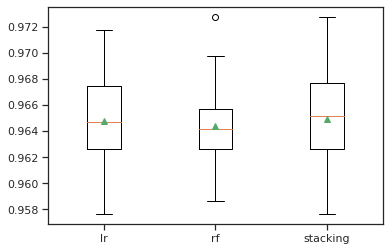

In [105]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Conclusion:

- Combining Logistic Regression and Random Forests does not improve the prediction
- The best model in my case is Logistic Regression as it has the best recall and f1-score
- There is not a big difference between dropping various numbers of features
- Logistic regression is only one that performs better after dropping 18 features (compared to not dropping any feature)

# Running the model on the provided data set

I will predict using Logistic Regression as that is the best performing one in my case.

Steps:

- Read in data set
- Merge `Missing` and `OTH` into `Unknown`
- Drop featuires to match the train set
- Encode `death_yn`
- Split data
- Predict
- Compare to `y_test` results

As the *provided data set* is not used for training a model and only for predicting I am not cleaning the data set, just preparing it as in a real life situation I would like the model to be able to predict on a data set that contains NaN values or even values that were not used for training and they made their way into the data set.

In [106]:
df_provided = pd.read_csv('24032021-covid19-cdc-deathyn-recent-10k.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [107]:
df_provided.replace({'hosp_yn' : {'Missing' : 'Unknown', 'OTH' : 'Unknown'}}, inplace=True)
df_provided.replace({'icu_yn' : {'Missing' : 'Unknown'}}, inplace=True)
df_provided.replace({'medcond_yn' : {'Missing' : 'Unknown'}}, inplace=True)
df_provided.replace({'race_ethnicity_combined' : {'Missing' : 'Unknown'}}, inplace=True)
df_provided.replace({'sex' : {'Missing' : 'Unknown'}}, inplace=True)
df_provided.replace({'age_group' : {'Missing' : 'Unknown'}}, inplace=True)

In [108]:
#df_provided.isnull().sum()
print("death_yn:", pd.unique(df["death_yn"]))

death_yn: ['No' 'Yes']


In [109]:
df_provided = df_provided.drop(["cdc_case_earliest_dt", "cdc_report_dt", "pos_spec_dt", "current_status", "sex", "onset_dt","race_ethnicity_combined"], 1)
df_provided

,age_group,hosp_yn,icu_yn,death_yn,medcond_yn
0,0 - 9 Years,No,Unknown,No,Unknown
1,30 - 39 Years,Unknown,Unknown,No,Unknown
2,40 - 49 Years,Unknown,Unknown,No,Unknown
3,40 - 49 Years,No,Unknown,No,No
4,40 - 49 Years,No,Unknown,No,Unknown
...,...,...,...,...,...
9995,30 - 39 Years,Unknown,Unknown,No,Unknown
9996,50 - 59 Years,No,Unknown,No,Unknown
9997,10 - 19 Years,Unknown,Unknown,No,Unknown
9998,20 - 29 Years,Unknown,Unknown,No,Unknown


In [110]:
df_rev2 = df_provided.copy()
df_rev2.replace({'death_yn' : {'No' : 0, 'Yes' : 1}}, inplace=True)
df_rev2['death_yn'] = df_rev2['death_yn'].astype('int64')

df_rev2_X = df_rev2.drop(["death_yn"], 1)
df_rev2_Y = df_rev2['death_yn']


df_rev2_dummy = pd.get_dummies(df_rev2_X, columns=['age_group','hosp_yn','icu_yn','medcond_yn'], drop_first=True)
df_rev2_X.shape

(10000, 4)

In [111]:
df_rev2_dummy.shape

(10000, 15)

In [112]:
multiple_logreg_predictions_provided = multiple_logisticreg.predict(df_rev2_dummy)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelogreg_provided = pd.concat([df_rev2_Y, pd.DataFrame(multiple_logreg_predictions_provided, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

   death_yn  Predicted
0         0        0.0
1         0        0.0
2         0        0.0
3         0        0.0
4         0        0.0
5         0        0.0
6         0        0.0
7         0        0.0
8         0        0.0
9         0        0.0


In [113]:
# Some more evaluation metrics.

print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_logisticreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_logisticreg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, multiple_logisticreg_predictions_test))
print("==================== Train Data =======================")
print()
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print()
print("==================== Provided Data ====================")
print("Accuracy: ", metrics.accuracy_score(df_rev2_Y, multiple_logreg_predictions_provided))
print("Confusion matrix: \n", metrics.confusion_matrix(df_rev2_Y, multiple_logreg_predictions_provided))
print("Classification report:\n ", metrics.classification_report(df_rev2_Y, multiple_logreg_predictions_provided))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.9626765299260256
Confusion matrix: 
 [[2834   25]
 [  86   29]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      2859
           1       0.54      0.25      0.34       115

    accuracy                           0.96      2974
   macro avg       0.75      0.62      0.66      2974
weighted avg       0.95      0.96      0.96      2974

==================== Train Data =======================

Accuracy:  0.9658353755225602
Confusion matrix: 
 [[6633   58]
 [ 179   67]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      6691
           1       0.54      0.27      0.36       246

    accuracy                           0.97      6937
   macro avg       0.75      0.63      0.67      6937
weighted avg       0.96      0.97      0.96      6937


==================== Provided

### Interpretation of Test resulst compared to Train results

- There is a large increase in True Positives when predictiong on the provided data set
- Accuracy
    - The accuracy of the Provided data is higher than test/train. 
- Precision
    - The precision score for predicting the positive case has lowered.
    - The precision score for predicting the negative case has increased.
- Recall
    - The recall score for predicting the positive case has increased.
    - The recall score for predicting the negative case has increased.
- F1
    - The f1 score for predicting the positive case is in between train and test.
    - The f1 score for predicting the negative case has increased.
    

## Conclusion:

- Most of the data had either **Missing** or **Unknown** values. The problem was that the features with a high correlation had a lot of missing values and I think that had a negative inpact on traing the models. I would be curious to compare the results I got from this notebook and also running the same notebook with a different data set. I think that having a different data set will have a large impact on the training of the model.

- The Linear Regression Model performed the worst out of the 3 but that was expected, and we couldn't use it due to the fact that we were solving a Classification problem. 

- There is not a big difference between Logistic Regression and Random Forest, when cosidering the recall and f1-scores using the **improved** Random Forest Model. I was expecting Random forest or even Decision Tree to perform better than logistic regression but it might have to do with the fact that Logistic Regression accounts more for outliers and as we are trying to predict only Yes/No most of the Unknown/Missing values could be considered an outlier value.

- When interpreting the models and checking how they are performing I used **recall** and **f1-score** more than accuracy as recall includes false negatives and f1 includes precision and recall in order to give a score. It is basically a more realistic interpretation of the model's performance.

- As a last observation I saw that the features that had the strongest correlation with our target feature had (almost) the most missing data.

#### 